# Neural Networks

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

##### 1. Softmax activation function

When performing multiclass classification problems (like with the MNIST data set) we used the softmax activation function. In lecture I referred to this as the multiclass equivalent of the sigmoid function, let's see why now.

Suppose we have some vector $z = (z_1, z_2, \dots, z_K) \in \mathbb{R}^K$. The $i^\text{th}$ entry of the softmax function applied to this vector is given by:
$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$

and so $\sigma$ maps $\mathbb{R}^K$ to $[0,1]^K$. As an example perhaps $z$ represents the values of your output nodes prior to activation, then the softmax turns these into "probabilities" of your observation being of class $i$.

##### 2. Backpropagation practice

Look at this architecture that comes from the following blog post (don't cheat and just look up the solution though!), <a href="https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/">https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/</a>

<img src="practice.png" width="60%"></img>

This is both our first time with a multi-output network and a network with bias so I'll help you with the set up. To get started here are the formulas for $h_1$ and $h_2$.

$$
h_1 = \Phi(w_1 x_1 + w_2 x_2 + b_1)
$$

$$
h_2 = \Phi(w_3 x_1 + w_4 x_2 + b_1)
$$

Also in the case of a multi-output network our cost function is a sum of the two errors:
$$
C = (o_1 - y_1)^2 + (o_2 - y_2)^2,
$$
where $y = (y_1,y_2)$ and $o_1,o_2$ can be thought of as the $\hat{y}$ in our simple example.

For this problem:
- Set up the equations for $o_1$ and $o_2$ in terms of $h_1$ and $h_2$,
- Calculate $\partial C/\partial w_5$, $\partial C/ \partial w_1$ and $\partial C/\partial b_2$.


You may record your answers in the markdown block if you would like to, math can be entered with typical latex commands with equations being contained in dollar signs.

##### ANSWER

$$
o_1 = \Phi(w_5 h_1 + w_6 h_2 + b_2)
$$

$$
o_2 = \Phi(w_7 h_1 + w_8 h_2 + b_2)
$$

$$
\frac{\partial C}{\partial w_5} = 2(o_1 - y_1) \frac{\partial o_1}{\partial w_5} = 2(o_1 - y_1) \Phi'(w_5 h_1 + w_6 h_2 + b_2) h_1
$$

$$
\frac{\partial C}{\partial w_1} = 2(o_1 - y_1) \frac{\partial o_1}{\partial w_1} + 2(o_2 - y_2) \frac{\partial o_2}{\partial w_1}
$$

$$
= 2(o_1 - y_1) \Phi'(w_5 h_1 + w_6 h_2 + b_2)w_5 \frac{\partial h_1}{\partial w_1} + 2(o_2 - y_2) \Phi'(w_7 h_1 + w_8 h_2 + b_2) w_7\frac{\partial h_1}{\partial w_1},
$$

$$
\text{where } \frac{\partial h_1}{\partial w_1} = \Phi'(w_1 x_1 + w_2 x_2 + b_1)x_1
$$

$$
\frac{\partial C}{\partial b_2} = 2(o_1 - y_1) \Phi' (w_5 h_1 + w_6 h_2 + b_2) + 2(o_2 - y_2) \Phi'(w_7 h_1 + w_8 h_2 + b_2)
$$

##### 3. Exclusive or (XOR) I

Recall that a failure of the perceptron was being able to produce nonlinear decision boundaries (or nonlinear regression in a regression setting). We demonstrated this with the following picture.

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([1,-1,-1,1])

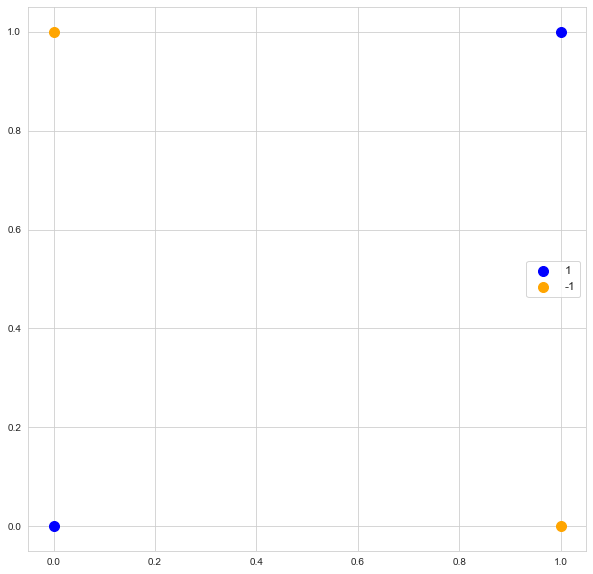

In [3]:
plt.figure(figsize=(10,10))

plt.scatter(X[y == 1,0],X[y == 1,1], c = 'b', label = "1", s=100)
plt.scatter(X[y == -1,0],X[y == -1,1], c = 'orange', label = "-1", s=100)

plt.legend(fontsize=12)

plt.show()

Using $\sigma = \text{sgn}$, show that a perceptron with a bias term cannot separate these data points.

<i>Hint</i>

The setup for this perceptron would be:

$$
\text{sgn}\left( w_1 x_1 + w_2 x_2 + b \right)
$$

###### Sample Solution.

Suppose, to the contrary, that the perceptron can separate these data. This implies that there exists $w_1, w_2$ and $b$ such that:

$$
b > 0, \ \ w_1 + w_2 + b > 0,  \ \ w_1 + b < 0, \ \text{and} \ w_2 + b < 0.
$$

The two less than inequalities imply:

$$
w_1 + w_2 + 2b < 0,
$$

however, the two greater than inequalities imply:

$$
w_1 + w_2 + 2b > 0.
$$

This is a contradiction.

##### 4. Exclusive or II

The classification problem above is roughly equivalent to building a classifier on these data.

In [4]:
X = np.zeros((10000,2))

X[:2500,:] = np.random.random((2500,2))
X[2500:5000,:] = np.random.random((2500,2)) + np.array([2,2])
X[5000:7500,:] = np.random.random((2500,2)) + np.array([0,2])
X[7500:,:] = np.random.random((2500,2)) + np.array([2,0])

y = np.zeros(10000)

y[:2500] = 1
y[2500:5000] = 1
y[5000:7500] = -1
y[7500:] = -1

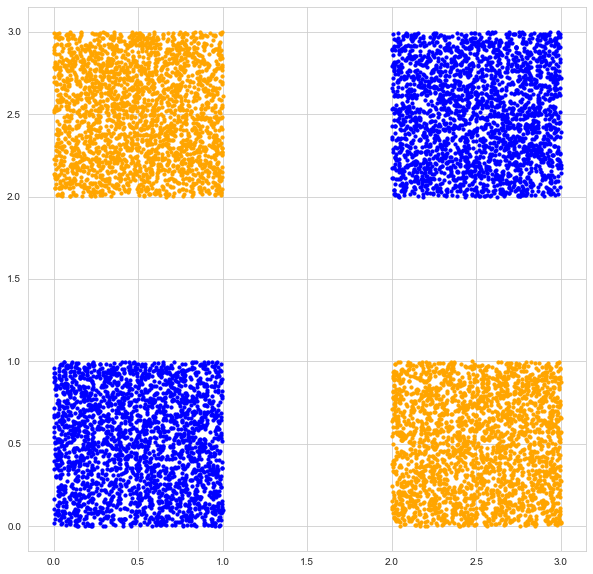

In [5]:
plt.figure(figsize=(10,10))

plt.scatter(X[y == 1,0],X[y == 1,1], c = 'b', label = "1", s=10)
plt.scatter(X[y == -1,0],X[y == -1,1], c = 'orange', label = "-1", s=10)

plt.show()

Using `sklearn` build a perceptron and a multilayer network with a single hidden layer of $100$ nodes, what is the accuracy of both on this data set?

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [7]:
perc = Perceptron()
mlp = MLPClassifier((100,))

In [8]:
perc.fit(X,y)
mlp.fit(X,y)

MLPClassifier()

In [9]:
print(accuracy_score(y, perc.predict(X)))
print(accuracy_score(y, mlp.predict(X)))

0.5
1.0


In [10]:
del perc, mlp

##### 5. Additional `keras` metrics

We used `"accuracy"` when specifying the metrics in the `compile` step. Look at the `keras` documentation on metrics to see what other metrics are available to us, <a href="https://keras.io/api/metrics/">https://keras.io/api/metrics/</a>.

##### 6. IMDB review sentiment

In the code below I load in an IMDB review sentiment data set. In these data there are IMDB reviews and a corresponding sentiment $y=0$ indicating a negative review, $y=1$ indicating a positive review. In particular each observation in `X_train` or `X_test` will have $5000$ columns corresponding to the $5000$ most used words across all reviews. The $i,j$ entry of `X_train` or `X_test` will thus represent the frequency at which IMDB review $i$ utilized word $j$.

In [11]:
## loading the data
from keras.datasets import imdb

num_words = 5000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [12]:
## preparing an X_train data set
## We're making a series of word frequency vectors
## Here column j is the frequency of word j in the review
## this is a standard way to process text based data
X_train_ff = np.zeros((len(train_data), num_words))
X_test_ff = np.zeros((len(test_data), num_words))

print("Starting word count vectorization for train data")
for i in range(len(train_data)):
    for j in train_data[i]:
        X_train_ff[i,j] = X_train_ff[i,j] + 1
print("Done with word count vectorization for train data")

print("Starting word count vectorization for test data")
for i in range(len(test_data)):
    for j in test_data[i]:
        X_test_ff[i,j] = X_test_ff[i,j] + 1
print("Done with word count vectorization for test data")

print("Now making word frequency vectors :)")
X_train_ff = X_train_ff/np.sum(X_train_ff, axis=1).reshape(-1,1)
X_test_ff = X_test_ff/np.sum(X_test_ff, axis=1).reshape(-1,1)

y_train_ff = train_labels.copy()
y_test_ff = test_labels.copy()

Starting word count vectorization for train data
Done with word count vectorization for train data
Starting word count vectorization for test data
Done with word count vectorization for test data
Now making word frequency vectors :)


In [13]:
## The shape of X_train
X_train_ff.shape

(25000, 5000)

In [14]:
## The shape of X_test
X_test_ff.shape

(25000, 5000)

In [15]:
## demonstrating the labeled data
y_train_ff

array([1, 0, 0, ..., 0, 1, 0])

Make a validation set of $15\%$ of the training data.

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_tt_ff, X_val_ff, y_tt_ff, y_val_ff = train_test_split(X_train_ff,y_train_ff,
                                                                   shuffle=True,
                                                                   random_state=440,
                                                                   test_size=.15,
                                                                   stratify=y_train_ff)

Build two feed forward neural networks on these data:
1. One with a single hidden layer with $64$ nodes,
2. Another with two hidden layers each with $32$ nodes.

Which one seems to perform better on the validation set?

In [19]:
## Import what you'll need from keras here
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [20]:
## Make an empty model object here
model1 = models.Sequential()

## Add your layers here
model1.add(layers.Dense(64, activation='relu', input_shape=(num_words,)))

model1.add(layers.Dense(1, activation='sigmoid'))

## compile the model here
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Fit your model here, don't forget to include your validation 
## data argument
history1 = model1.fit(X_tt_ff, y_tt_ff,
                      epochs=100,
                      batch_size=500,
                      validation_data=(X_val_ff,y_val_ff))

history_dict1 = history1.history

Epoch 1/100
12/43 [=======>......................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5865

2022-05-19 11:33:24.971822: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-19 11:33:24.971984: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


43/43 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.6805 - val_loss: 0.6736 - val_accuracy: 0.7056
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 0.6617 - accuracy: 0.7461 - val_loss: 0.6506 - val_accuracy: 0.7664
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.7720 - val_loss: 0.6246 - val_accuracy: 0.7717
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6068 - accuracy: 0.7902 - val_loss: 0.5953 - val_accuracy: 0.7901
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.5768 - accuracy: 0.7999 - val_loss: 0.5663 - val_accuracy: 0.8037
Epoch 6/100
43/43 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.8162 - val_loss: 0.5370 - val_accuracy: 0.8141
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 0.5161 - accuracy: 0.8285 - val_loss: 0.5086 - val_accuracy: 0.8232
Epoch 8/100
43/43 [======

Epoch 59/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1676 - accuracy: 0.9397 - val_loss: 0.2821 - val_accuracy: 0.8925
Epoch 60/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1663 - accuracy: 0.9392 - val_loss: 0.2797 - val_accuracy: 0.8963
Epoch 61/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1652 - accuracy: 0.9410 - val_loss: 0.2786 - val_accuracy: 0.8941
Epoch 62/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1637 - accuracy: 0.9407 - val_loss: 0.2815 - val_accuracy: 0.8949
Epoch 63/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1626 - accuracy: 0.9411 - val_loss: 0.2845 - val_accuracy: 0.8928
Epoch 64/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9423 - val_loss: 0.2813 - val_accuracy: 0.8955
Epoch 65/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1603 - accuracy: 0.9424 - val_loss: 0.2892 - val_accuracy: 0.8925
Epoch 

In [21]:
## Make an empty model object here
model2 = models.Sequential()

## Add your layers here
model2.add(layers.Dense(32, activation='relu', input_shape=(num_words,)))
model2.add(layers.Dense(32, activation='relu'))


model2.add(layers.Dense(1, activation='sigmoid'))

## compile the model here
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Fit your model here, don't forget to include your validation 
## data argument
history2 = model2.fit(X_tt_ff, y_tt_ff,
                      epochs=100,
                      batch_size=500,
                      validation_data=(X_val_ff,y_val_ff))

history_dict2 = history2.history

Epoch 1/100
43/43 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.6702 - val_loss: 0.6725 - val_accuracy: 0.7579
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.7684 - val_loss: 0.6312 - val_accuracy: 0.7867
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.8014 - val_loss: 0.5736 - val_accuracy: 0.8040
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.8283 - val_loss: 0.5070 - val_accuracy: 0.8277
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.8483 - val_loss: 0.4461 - val_accuracy: 0.8429
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.4095 - accuracy: 0.8612 - val_loss: 0.3954 - val_accuracy: 0.8523
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8733 - val_loss: 0.3575 - val_accuracy: 0.8653
Epoch 8/100
4

Epoch 59/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.9624 - val_loss: 0.3792 - val_accuracy: 0.8773
Epoch 60/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9635 - val_loss: 0.3887 - val_accuracy: 0.8757
Epoch 61/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1094 - accuracy: 0.9638 - val_loss: 0.3967 - val_accuracy: 0.8728
Epoch 62/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1085 - accuracy: 0.9632 - val_loss: 0.4034 - val_accuracy: 0.8728
Epoch 63/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9643 - val_loss: 0.4125 - val_accuracy: 0.8760
Epoch 64/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9645 - val_loss: 0.4010 - val_accuracy: 0.8744
Epoch 65/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.9660 - val_loss: 0.4069 - val_accuracy: 0.8723
Epoch 

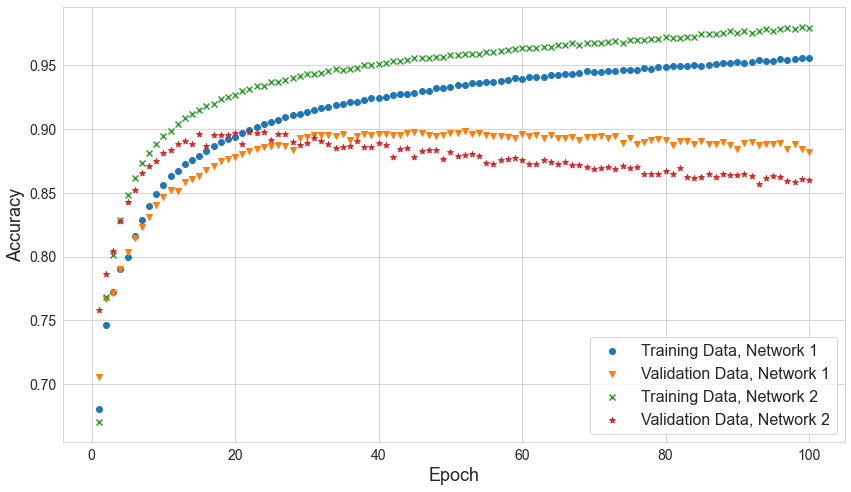

In [22]:
plt.figure(figsize=(14,8))

plt.scatter(range(1,101), history_dict1['accuracy'], label="Training Data, Network 1")
plt.scatter(range(1,101), history_dict1['val_accuracy'], marker='v', label="Validation Data, Network 1")
plt.scatter(range(1,101), history_dict2['accuracy'], marker='x', label="Training Data, Network 2")
plt.scatter(range(1,101), history_dict2['val_accuracy'], marker='*', label="Validation Data, Network 2")

plt.legend(fontsize=16)

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

It seems to me that the $32\times 32$ neural network out performs the single layer network.

##### 7. Adding Dropout Layers

Sometimes you can combat overfitting by randomly dropping some of the nodes in the model. In `keras` this is accomplished with the `Dropout` layer. This layer will randomly set some of the nodes from the previous layer to $0$ with probability `rate` and scale the remaining nodes by $1/(1-\text{rate})$.

Return to the network you trained in the previous problem and add a `Dropout` layer using the code I provide below. Does this improve your model? (I'm not sure if it will in this particular model or not, but I wanted to give you a chance to practice adding a `Dropout` layer.

Note you'll be plotting the validation and training accuracies of both models below, so store your history in a different variable than you used for question 2.

Docs: <a href="https://keras.io/api/layers/regularization_layers/dropout/">https://keras.io/api/layers/regularization_layers/dropout/</a>.

In [23]:
## Add your model from above.
## Make an empty model object here
model3 = models.Sequential()

## Add your layers here
model3.add(layers.Dense(32, activation='relu', input_shape=(num_words,)))

model3.add(layers.Dense(32, activation='relu'))

## prior to the output layer we'll add this dropout layer
rate = .1
model3.add(layers.Dropout(rate=rate))

model3.add(layers.Dense(1, activation='sigmoid'))

## compile the model here
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Fit your model here, don't forget to include your validation 
## data argument
history_drop = model3.fit(X_tt_ff, y_tt_ff,
                              epochs=100,
                              batch_size=500,
                              validation_data=(X_val_ff,y_val_ff))

history_drop_dict = history_drop.history

Epoch 1/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.6639 - val_loss: 0.6706 - val_accuracy: 0.7701
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.7705 - val_loss: 0.6279 - val_accuracy: 0.7867
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.8002 - val_loss: 0.5681 - val_accuracy: 0.8123
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.8244 - val_loss: 0.5047 - val_accuracy: 0.8259
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.8440 - val_loss: 0.4442 - val_accuracy: 0.8456
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.4117 - accuracy: 0.8577 - val_loss: 0.3968 - val_accuracy: 0.8539
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.8712 - val_loss: 0.3586 - val_accuracy: 0.8643
Epoch 8/100
4

Epoch 59/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1110 - accuracy: 0.9649 - val_loss: 0.3851 - val_accuracy: 0.8720
Epoch 60/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.9642 - val_loss: 0.3838 - val_accuracy: 0.8747
Epoch 61/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1097 - accuracy: 0.9648 - val_loss: 0.3988 - val_accuracy: 0.8757
Epoch 62/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1092 - accuracy: 0.9654 - val_loss: 0.3966 - val_accuracy: 0.8760
Epoch 63/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1062 - accuracy: 0.9676 - val_loss: 0.3950 - val_accuracy: 0.8739
Epoch 64/100
43/43 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9670 - val_loss: 0.3999 - val_accuracy: 0.8741
Epoch 65/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1049 - accuracy: 0.9680 - val_loss: 0.4173 - val_accuracy: 0.8648
Epoch 

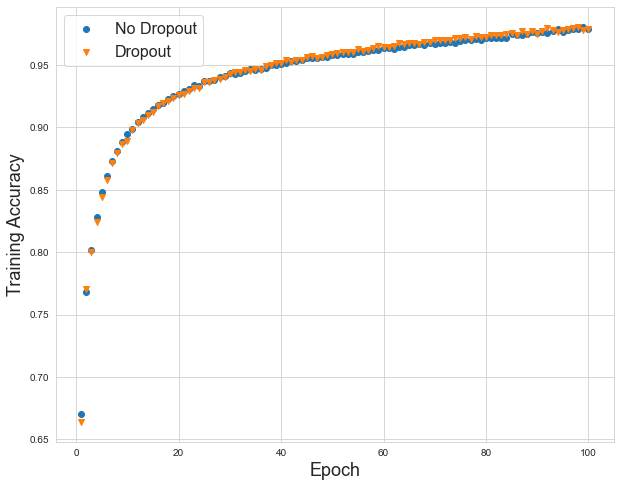

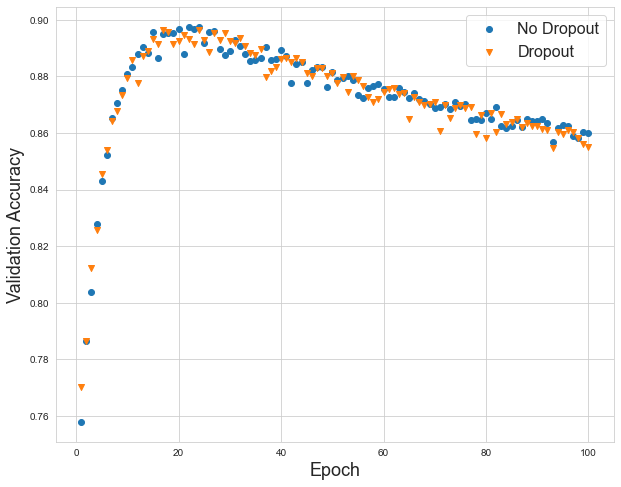

In [24]:
plt.figure(figsize=(10,8))

plt.scatter(range(1,101), history_dict2['accuracy'], label="No Dropout")
plt.scatter(range(1,101), history_drop_dict['accuracy'], marker='v', label="Dropout")

plt.legend(fontsize=16)


plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Training Accuracy", fontsize=18)

plt.show()

## plot the validation accuracy of both models here
plt.figure(figsize=(10,8))

plt.scatter(range(1,101), history_dict2['val_accuracy'], label="No Dropout")
plt.scatter(range(1,101), history_drop_dict['val_accuracy'], marker='v', label="Dropout")

plt.legend(fontsize=16)


plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Validation Accuracy", fontsize=18)

plt.show()

In [25]:
del model1, model3

##### 8. Compare to `SimpleRNN`

Run the code below to compare the feed forward results to the `SimpleRNN` network we built in lecture.

In [26]:
## This will need to be edited if you have a later version of keras
from keras.preprocessing import sequence

In [27]:
## This will need to be edited if you have a later version of keras
max_features = 5000
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=max_features)

max_length = 100
X_train_seq = sequence.pad_sequences(X_train, maxlen=100)
X_test_seq = sequence.pad_sequences(X_test, maxlen=100)


X_tt_seq,X_val_seq,y_tt_seq,y_val_seq = train_test_split(X_train_seq, y_train,
                                                           test_size=.2,
                                                           shuffle=True,
                                                           stratify = y_train,
                                                           random_state=440)

In [40]:
del simple_rnn_model

In [41]:
simple_rnn_model = models.Sequential()

simple_rnn_model.add( layers.Embedding(max_features, 32) )
simple_rnn_model.add( layers.SimpleRNN(32, return_sequences = False) )


simple_rnn_model.add(layers.Dense(1, activation='sigmoid'))

simple_rnn_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


epochs = 100

history_snn = simple_rnn_model.fit(X_tt_seq, y_tt_seq,
                                    epochs = epochs,
                                    batch_size=500,
                                    validation_data=(X_val_seq,y_val_seq))

history_snn_dict = history_snn.history

Epoch 1/100
40/40 [==============================] - 1s 31ms/step - loss: 0.6815 - accuracy: 0.5585 - val_loss: 0.6528 - val_accuracy: 0.6404
Epoch 2/100
40/40 [==============================] - 1s 30ms/step - loss: 0.5400 - accuracy: 0.7527 - val_loss: 0.5019 - val_accuracy: 0.7634
Epoch 3/100
40/40 [==============================] - 1s 30ms/step - loss: 0.4186 - accuracy: 0.8237 - val_loss: 0.4426 - val_accuracy: 0.8176
Epoch 4/100
40/40 [==============================] - 1s 29ms/step - loss: 0.3452 - accuracy: 0.8621 - val_loss: 0.3925 - val_accuracy: 0.8296
Epoch 5/100
40/40 [==============================] - 1s 30ms/step - loss: 0.2915 - accuracy: 0.8894 - val_loss: 0.4144 - val_accuracy: 0.8202
Epoch 6/100
40/40 [==============================] - 1s 31ms/step - loss: 0.2367 - accuracy: 0.9148 - val_loss: 0.3939 - val_accuracy: 0.8404
Epoch 7/100
40/40 [==============================] - 1s 30ms/step - loss: 0.1991 - accuracy: 0.9307 - val_loss: 0.4092 - val_accuracy: 0.8242
Epoch 

Epoch 58/100
40/40 [==============================] - 1s 29ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 1.1864 - val_accuracy: 0.7854
Epoch 59/100
40/40 [==============================] - 1s 29ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 1.2129 - val_accuracy: 0.7808
Epoch 60/100
40/40 [==============================] - 1s 29ms/step - loss: 0.0171 - accuracy: 0.9966 - val_loss: 1.1803 - val_accuracy: 0.7890
Epoch 61/100
40/40 [==============================] - 1s 30ms/step - loss: 9.7149e-04 - accuracy: 0.9997 - val_loss: 1.2036 - val_accuracy: 0.7862
Epoch 62/100
40/40 [==============================] - 1s 30ms/step - loss: 7.1771e-05 - accuracy: 1.0000 - val_loss: 1.1901 - val_accuracy: 0.7942
Epoch 63/100
40/40 [==============================] - 1s 29ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 1.2140 - val_accuracy: 0.7890
Epoch 64/100
40/40 [==============================] - 1s 30ms/step - loss: 3.0040e-04 - accuracy: 0.9999 - val_loss: 1.2025 - val_accu

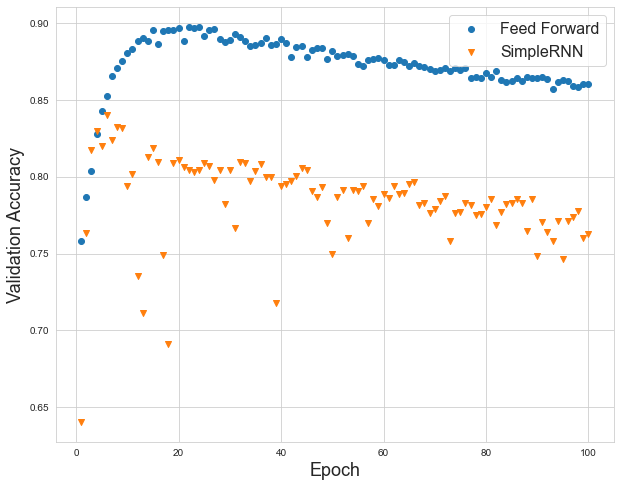

In [42]:
## plot the validation accuracy of both models here
plt.figure(figsize=(10,8))

plt.scatter(range(1,101), history_dict2['val_accuracy'], label="Feed Forward")
plt.scatter(range(1,101), history_snn_dict['val_accuracy'], marker='v', label="SimpleRNN")

plt.legend(fontsize=16)


plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Validation Accuracy", fontsize=18)

plt.show()

##### 9. `LSTM` layer

An adjustment to the `SimpleRNN` architecture came in the form of the so-called "Long Short-Term Memory" or LSTM architecture. 

This adjustment addressed the issue of disappearing gradients that occurr due to the long sequences involved in the standard RNN architecture. These disappearing gradients during backpropagation mean that the networks pay much more attention to more recent terms in the sequence than further back terms.

While I will not dive into the mathematical setup of LSTM networks here, check out section 7.5 of this text, <a href="https://d1wqtxts1xzle7.cloudfront.net/63954267/2018_Book_NeuralNetworksAndDeepLearning20200718-22595-1luren6-with-cover-page-v2.pdf?Expires=1652983581&Signature=LT2OEq4kN4bAjeVMo0Gi1B-JPuy0TUYR1VuGhVOnEiHc-bvoUY1-OHLSiLh8EAVQhMHG5U2x6Umg1muZArOvflSiZpDpTnKVMsjGdZYQs4CULVXGw~Zf4kl7jQiZJG4jRZZuA6m2-vxb9kykkEUqNLjdGATea2UJd9AbkkFUUnLUTWdLSNy5wSLKTKU~pYxYIrfhUZgUw4~pc9RBut4Z5L5W7bYhYhMyI10TTwqvtrzqMekCVLsZt8aNjqYkcYi1bBtsGT5yxqV85s6lfPezZaBR5xBvcccaga7zq9OKuwWwltiMhuldPUXZFt9jBGs5mu-kZsauNU0fvTCdKPA-QA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA">https://d1wqtxts1xzle7.cloudfront.net/63954267/2018_Book_NeuralNetworksAndDeepLearning20200718-22595-1luren6-with-cover-page-v2.pdf?Expires=1652983581&Signature=LT2OEq4kN4bAjeVMo0Gi1B-JPuy0TUYR1VuGhVOnEiHc-bvoUY1-OHLSiLh8EAVQhMHG5U2x6Umg1muZArOvflSiZpDpTnKVMsjGdZYQs4CULVXGw~Zf4kl7jQiZJG4jRZZuA6m2-vxb9kykkEUqNLjdGATea2UJd9AbkkFUUnLUTWdLSNy5wSLKTKU~pYxYIrfhUZgUw4~pc9RBut4Z5L5W7bYhYhMyI10TTwqvtrzqMekCVLsZt8aNjqYkcYi1bBtsGT5yxqV85s6lfPezZaBR5xBvcccaga7zq9OKuwWwltiMhuldPUXZFt9jBGs5mu-kZsauNU0fvTCdKPA-QA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA</a>.

In this problem you will walk through building an LSTM network on the IMDB data and comparing the performance to the previous two models.

In [45]:
## Make an empty sequential model here
lstm_model = models.Sequential()

## add the same embedding layer here
lstm_model.add( layers.Embedding(max_features, 32) )

## add the first LSTM layer
## setting return_sequences=True allows us to add a second LSTM layer
lstm_model.add( layers.LSTM(32, return_sequences = True) )

## add the second LSTM layer
## set return_sequences=False
lstm_model.add( layers.LSTM(32, return_sequences = False) )


## add the output layer
lstm_model.add(layers.Dense(1, activation='sigmoid'))

## compile the model
lstm_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

## train the model
## Note this will take several minutes
epochs = 100

history_lstm = lstm_model.fit(X_tt_seq, y_tt_seq,
                                    epochs = epochs,
                                    batch_size=500,
                                    validation_data=(X_val_seq,y_val_seq))

history_lstm_dict = history_lstm.history

Epoch 1/100
40/40 [==============================] - 8s 193ms/step - loss: 0.5918 - accuracy: 0.6745 - val_loss: 0.4861 - val_accuracy: 0.7776
Epoch 2/100
40/40 [==============================] - 8s 202ms/step - loss: 0.4060 - accuracy: 0.8206 - val_loss: 0.3848 - val_accuracy: 0.8288
Epoch 3/100
40/40 [==============================] - 9s 216ms/step - loss: 0.3389 - accuracy: 0.8547 - val_loss: 0.4127 - val_accuracy: 0.8208
Epoch 4/100
40/40 [==============================] - 10s 243ms/step - loss: 0.3077 - accuracy: 0.8731 - val_loss: 0.3742 - val_accuracy: 0.8414
Epoch 5/100
40/40 [==============================] - 10s 242ms/step - loss: 0.2817 - accuracy: 0.8856 - val_loss: 0.4366 - val_accuracy: 0.8212
Epoch 6/100
40/40 [==============================] - 10s 241ms/step - loss: 0.2674 - accuracy: 0.8929 - val_loss: 0.3694 - val_accuracy: 0.8364
Epoch 7/100
40/40 [==============================] - 8s 204ms/step - loss: 0.2518 - accuracy: 0.9008 - val_loss: 0.3994 - val_accuracy: 0.8

Epoch 58/100
40/40 [==============================] - 8s 208ms/step - loss: 6.1444e-04 - accuracy: 0.9999 - val_loss: 1.3417 - val_accuracy: 0.8122
Epoch 59/100
40/40 [==============================] - 9s 226ms/step - loss: 1.4941e-04 - accuracy: 1.0000 - val_loss: 1.4531 - val_accuracy: 0.8138
Epoch 60/100
40/40 [==============================] - 9s 229ms/step - loss: 5.8273e-05 - accuracy: 1.0000 - val_loss: 2.1347 - val_accuracy: 0.7716
Epoch 61/100
40/40 [==============================] - 9s 220ms/step - loss: 0.0374 - accuracy: 0.9937 - val_loss: 1.4875 - val_accuracy: 0.8086
Epoch 62/100
40/40 [==============================] - 9s 218ms/step - loss: 6.0393e-05 - accuracy: 1.0000 - val_loss: 1.5523 - val_accuracy: 0.8102
Epoch 63/100
40/40 [==============================] - 8s 205ms/step - loss: 0.0298 - accuracy: 0.9944 - val_loss: 1.4699 - val_accuracy: 0.8056
Epoch 64/100
40/40 [==============================] - 9s 223ms/step - loss: 9.0171e-04 - accuracy: 0.9998 - val_loss: 1.

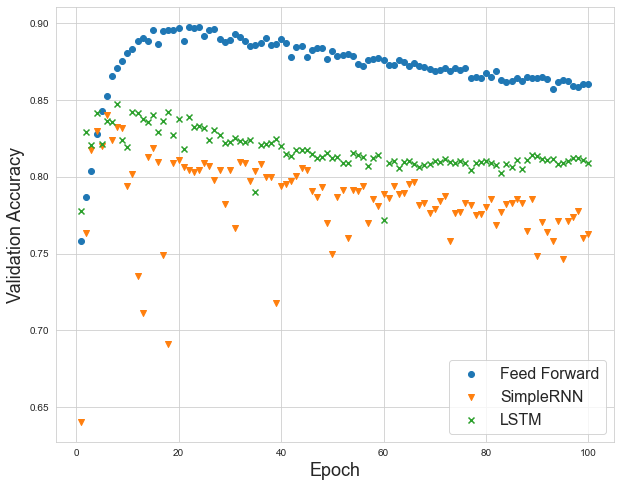

In [46]:
## plot the validation accuracy of all 3 models here
plt.figure(figsize=(10,8))

plt.scatter(range(1,101), history_dict2['val_accuracy'], label="Feed Forward")
plt.scatter(range(1,101), history_snn_dict['val_accuracy'], marker='v', label="SimpleRNN")
plt.scatter(range(1,101), history_lstm_dict['val_accuracy'], marker='x', label="LSTM")


plt.legend(fontsize=16)


plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Validation Accuracy", fontsize=18)

plt.show()

The LSTM outperforms the Simple RNN model, but still lags behind the feed forward network we built above. Note that this is not the most fair comparison, because the RNNs are using significantly less data than the feed forward network. We could likely improve performance if we increased tried different sequence lengths.

Another common RNN architecture people use is a <i>gated recurrent unit</i> or GRU layer. You can learn about such a layer in section 7.6 of the above text reference, and you can implement it in `keras` with `layers.GRU`, <a href="https://keras.io/api/layers/recurrent_layers/gru/">https://keras.io/api/layers/recurrent_layers/gru/</a>.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)